In [1]:
%matplotlib inline
import matplotlib.pylab as plt

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import pandas as pd
import numpy as np

In [2]:
from tsfresh.examples.har_dataset import download_har_dataset, load_har_dataset, load_har_classes
download_har_dataset()

In [3]:
df = load_har_dataset()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,0.001412,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,-0.000104,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,0.000661,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,...,0.000458,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,...,0.002529,0.003518,-0.000248,-0.002761,0.000252,0.003752,0.001626,-0.000698,-0.001223,-0.003328


In [4]:
y = load_har_classes()
y.head()

/usr/local/Caskroom/miniforge/base/envs/bishe/lib/python3.8/site-packages/tsfresh/examples/har_dataset.py:95: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  return pd.read_csv(


0    5
1    5
2    5
3    5
4    5
Name: 0, dtype: int64

In [5]:
df["id"] = df.index
df = df.melt(id_vars="id", var_name="time").sort_values(["id", "time"]).reset_index(drop=True)
df.head()

,id,time,value
0,0,0,0.000181
1,0,1,0.010139
2,0,2,0.009276
3,0,3,0.005066
4,0,4,0.010810


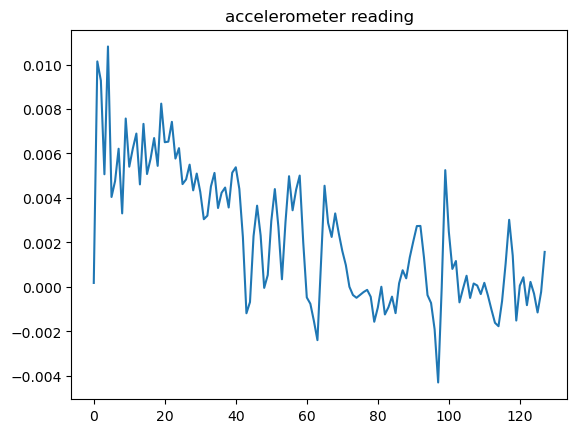

In [6]:
plt.title('accelerometer reading')
plt.plot(df[df["id"] == 0].set_index("time").value)
plt.show()

In [7]:
X = extract_features(df[df["id"] < 500], column_id="id", column_sort="time", impute_function=impute)
X.head()

Feature Extraction: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:05<00:00,  9.01it/s]


,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,"value__matrix_profile__feature_""min""__threshold_0.98","value__matrix_profile__feature_""max""__threshold_0.98","value__matrix_profile__feature_""mean""__threshold_0.98","value__matrix_profile__feature_""median""__threshold_0.98","value__matrix_profile__feature_""25""__threshold_0.98","value__matrix_profile__feature_""75""__threshold_0.98",value__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,0.0,0.0,0.290392,0.001766,0.001435,0.000011,-0.000032,0.002025,...,4.555721,4.724480,0.0,1.111900,2.837645,1.800238,1.731414,1.464639,2.113387,0.008684
1,0.0,0.0,0.0,0.0,0.022239,0.000506,0.001323,-0.000021,-0.000008,0.000110,...,4.520418,4.747206,0.0,0.785462,2.741869,1.615160,1.608568,1.329079,1.895041,0.005250
2,0.0,0.0,0.0,0.0,0.054796,0.001106,0.001827,-0.000011,0.000001,0.000627,...,4.409911,4.735843,0.0,0.913254,3.107882,1.692529,1.614387,1.329484,1.952855,0.007916
3,0.0,0.0,0.0,0.0,0.042157,0.000932,0.001470,0.000014,0.000003,0.000269,...,4.335833,4.686101,0.0,0.897427,2.796923,1.656214,1.683194,1.404298,1.864329,0.007687
4,0.0,0.0,0.0,0.0,-0.024980,0.000525,0.001215,-0.000027,-0.000007,-0.000144,...,4.350795,4.656301,0.0,1.231613,2.762502,1.926316,1.957036,1.647432,2.165181,0.004961


In [8]:
# without selection (for later comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y[:500], test_size=.2)

In [9]:
classifier_full = DecisionTreeClassifier()
classifier_full.fit(X_train, y_train)
print(classification_report(y_test, classifier_full.predict(X_test)))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        30
           2       0.83      0.83      0.83        12
           3       1.00      1.00      1.00        13
           4       0.44      0.58      0.50        12
           5       0.69      0.65      0.67        17
           6       0.46      0.38      0.41        16

    accuracy                           0.75       100
   macro avg       0.73      0.73      0.72       100
weighted avg       0.75      0.75      0.75       100



In [10]:
relevant_features = set()
for label in y.unique():
    y_train_binary = y_train == label
    X_train_filtered = select_features(X_train, y_train_binary)
    print("Number of relevant features for class {}: {}/{}".format(label, X_train_filtered.shape[1], X_train.shape[1]))
    relevant_features = relevant_features.union(set(X_train_filtered.columns))

Number of relevant features for class 5: 242/789
Number of relevant features for class 4: 223/789
Number of relevant features for class 6: 207/789
Number of relevant features for class 1: 236/789
Number of relevant features for class 3: 263/789
Number of relevant features for class 2: 201/789


In [11]:
len(relevant_features)

310

In [12]:
X_train_filtered = X_train[list(relevant_features)]
X_test_filtered = X_test[list(relevant_features)]

In [13]:
classifier_selected = DecisionTreeClassifier()
classifier_selected.fit(X_train_filtered, y_train)
print(classification_report(y_test, classifier_selected.predict(X_test_filtered)))

              precision    recall  f1-score   support

           1       0.94      0.97      0.95        30
           2       0.92      0.92      0.92        12
           3       1.00      0.92      0.96        13
           4       0.44      0.58      0.50        12
           5       0.62      0.47      0.53        17
           6       0.56      0.56      0.56        16

    accuracy                           0.76       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.77      0.76      0.76       100



In [19]:
X_train_filtered_multi = select_features(X_train, y_train, multiclass=True, n_significant=5)
X_train_filtered_multi.shape

(400, 195)

In [20]:
classifier_selected_multi = DecisionTreeClassifier()
classifier_selected_multi.fit(X_train_filtered_multi, y_train)
X_test_filtered_multi = X_test[X_train_filtered_multi.columns]
print(classification_report(y_test, classifier_selected_multi.predict(X_test_filtered_multi)))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        30
           2       1.00      0.83      0.91        12
           3       1.00      1.00      1.00        13
           4       0.40      0.33      0.36        12
           5       0.69      0.53      0.60        17
           6       0.50      0.69      0.58        16

    accuracy                           0.77       100
   macro avg       0.75      0.73      0.74       100
weighted avg       0.78      0.77      0.77       100

